# Individual Assignment. Exploratory Data Analysis





In part 1 of this assignment, we will focus on exploratory data analysis of stock prices. Keep in mind, this assignment is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is challenging and you have to look things up on your own to try to solve the tasks issued. **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2017.

## BANA 212 Section B
## Teng-Yun Chung
## Student ID: 92443989
## Study Group - Yuan Liu, Takakao Suzuki, Kuang (Steven) Li

# Part 1


## Get the Data

In this section we will learn how to use pandas to directly read data from Yahoo finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).*

### The Imports


In [73]:
# !pip install pandas-datareader
# !pip install --upgrade pandas
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2016 to Jan 1st 2017 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [4]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [5]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [6]:
WFC[['Close']]

,Close
Date,
2016-01-04,52.910000
2016-01-05,52.889999
2016-01-06,51.880001
2016-01-07,50.400002
2016-01-08,49.560001
...,...
2016-12-23,55.959999
2016-12-27,55.950001
2016-12-28,55.320000


In [107]:
# WFC.reset_index(inplace=True)
# WFC["Date"].value_counts()

2016-09-08    1
2016-03-08    1
2016-07-07    1
2016-09-07    1
2016-11-08    1
             ..
2016-06-08    1
2016-08-09    1
2016-09-09    1
2016-10-10    1
2016-08-08    1
Name: Date, Length: 252, dtype: int64

In [7]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)
df

Attributes  Adj Close                                                          \
Symbols           BAC          C          GS        JPM         MS        WFC   
Date                                                                            
2016-01-04  15.373302  47.502300  167.424698  57.331673  28.655018  46.564404   
2016-01-05  15.373302  47.251461  164.541977  57.430794  28.472967  46.546799   
2016-01-06  15.045812  46.563961  160.525070  56.601742  27.762959  45.657928   
2016-01-07  14.503113  44.185600  155.591339  54.312798  26.379364  44.355438   
2016-01-08  14.222406  42.857063  154.948654  53.096230  25.833206  43.616177   
...               ...        ...         ...        ...        ...        ...   
2016-12-23  21.477459  57.187084  231.294006  80.220718  40.155926  50.831436   
2016-12-27  21.486963  57.280842  231.860291  80.294456  40.211868  50.822350   
2016-12-28  21.220873  56.296318  230.986847  79.713867  39.745598  50.250080   
2016-12-29  20.907263  55.677467  228.616043  79.151733  39.307293  49.814072   
2016-12-30  21.002296  55.724358  229.835037  79.520355  39.400547  50.059334   

Attributes      Close                                    ...        Open  \
Symbols           BAC          C          GS        JPM  ...          GS   
Date                                                     ...               
2016-01-04  16.430000  51.130001  177.139999  63.619999  ...  175.789993   
2016-01-05  16.430000  50.860001  174.089996  63.730000  ...  176.710007   
2016-01-06  16.080000  50.119999  169.839996  62.810001  ...  171.309998   
2016-01-07  15.500000  47.560001  164.619995  60.270000  ...  166.669998   
2016-01-08  15.200000  46.130001  163.940002  58.919998  ...  166.750000   
...               ...        ...         ...        ...  ...         ...   
2016-12-23  22.600000  60.990002  240.970001  87.050003  ...  239.539993   
2016-12-27  22.610001  61.090000  241.559998  87.129997  ...  241.949997   
2016-12-28  22.330000  60.040001  240.649994  86.500000  ...  243.690002   
2016-12-29  22.000000  59.380001  238.179993  85.889999  ...  240.750000   
2016-12-30  22.100000  59.430000  239.449997  86.290001  ...  238.509995   

Attributes                                        Volume              \
Symbols           JPM         MS        WFC          BAC           C   
Date                                                                   
2016-01-04  63.950001  30.700001  53.090000  114888000.0  23440200.0   
2016-01-05  63.700001  31.480000  52.930000   66670000.0  17444900.0   
2016-01-06  62.720001  30.629999  52.119999  102760800.0  22501800.0   
2016-01-07  61.459999  29.879999  51.009998  116255900.0  37902900.0   
2016-01-08  61.130001  29.410000  50.799999  124782400.0  30643000.0   
...               ...        ...        ...          ...         ...   
2016-12-23  87.000000  42.860001  55.779999   38187800.0   9314000.0   
2016-12-27  87.050003  43.270000  55.900002   39988600.0   9544000.0   
2016-12-28  87.160004  43.250000  55.980000   52652900.0  17127400.0   
2016-12-29  86.580002  42.650002  55.189999   79188400.0  17121200.0   
2016-12-30  86.099998  42.169998  54.889999   72605900.0  16588500.0   

Attributes                                                 
Symbols            GS         JPM          MS         WFC  
Date                                                       
2016-01-04  3745500.0  25393200.0  15749200.0  25985400.0  
2016-01-05  4521600.0  16566700.0   9850500.0  14759600.0  
2016-01-06  5539400.0  22961500.0  13057400.0  20026400.0  
2016-01-07  5687900.0  27630900.0  18138200.0  30425600.0  
2016-01-08  4929800.0  22373300.0  15295600.0  22981400.0  
...               ...         ...         ...         ...  
2016-12-23  2187500.0  10759400.0   6733000.0   8313000.0  
2016-12-27  1998200.0   6946400.0   5927000.0   8893900.0  
2016-12-28  3053000.0   9455600.0   4854500.0  10609100.0  
2016-12-29  2619000.0  14689000.0   7180200.0  15933500.0  
2016-12-30 

##### Add a Column_Company Name (this is filled out for you)

In [8]:
BAC["Company"]='BOA'
C["Company"]='Citi'
GS["Company"]='GoldmanSachs'
JPM["Company"]='JPMorgan'
MS["Company"]='MorganStanley'
WFC["Company"]='WellsFargo'

In [9]:
df.head()

Attributes  Adj Close                                                          \
Symbols           BAC          C          GS        JPM         MS        WFC   
Date                                                                            
2016-01-04  15.373302  47.502300  167.424698  57.331673  28.655018  46.564404   
2016-01-05  15.373302  47.251461  164.541977  57.430794  28.472967  46.546799   
2016-01-06  15.045812  46.563961  160.525070  56.601742  27.762959  45.657928   
2016-01-07  14.503113  44.185600  155.591339  54.312798  26.379364  44.355438   
2016-01-08  14.222406  42.857063  154.948654  53.096230  25.833206  43.616177   

Attributes  Close                                    ...        Open  \
Symbols       BAC          C          GS        JPM  ...          GS   
Date                                                 ...               
2016-01-04  16.43  51.130001  177.139999  63.619999  ...  175.789993   
2016-01-05  16.43  50.860001  174.089996  63.730000  ...  176.710007   
2016-01-06  16.08  50.119999  169.839996  62.810001  ...  171.309998   
2016-01-07  15.50  47.560001  164.619995  60.270000  ...  166.669998   
2016-01-08  15.20  46.130001  163.940002  58.919998  ...  166.750000   

Attributes                                        Volume              \
Symbols           JPM         MS        WFC          BAC           C   
Date                                                                   
2016-01-04  63.950001  30.700001  53.090000  114888000.0  23440200.0   
2016-01-05  63.700001  31.480000  52.930000   66670000.0  17444900.0   
2016-01-06  62.720001  30.629999  52.119999  102760800.0  22501800.0   
2016-01-07  61.459999  29.879999  51.009998  116255900.0  37902900.0   
2016-01-08  61.130001  29.410000  50.799999  124782400.0  30643000.0   

Attributes                                                 
Symbols            GS         JPM          MS         WFC  
Date                                                       
2016-01-04  3745500.0  25393200.0  15749200.0  25985400.0  
2016-01-05  4521600.0  16566700.0   9850500.0  14759600.0  
2016-01-06  5539400.0  22961500.0  13057400.0  20026400.0  
2016-01-07  5687900.0  27630900.0  18138200.0  30425600.0  
2016-01-08  4929800.0  22373300.0  15295600.0  22981400.0  

[5 rows x 36 columns]

##### Draw the closing prices of BAC

C:\Users\Cjaco\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Close Price')

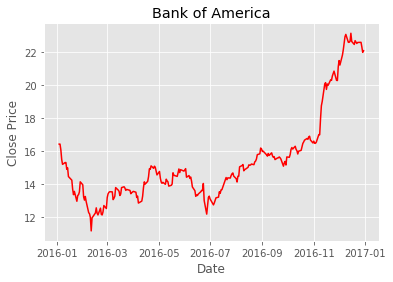

In [10]:
import matplotlib.pyplot as plt
# your code here
plt.style.use('ggplot')
BAC["Close"]
plt.plot(BAC["Close"],"r")
plt.title("Bank of America")
plt.xlabel("Date")
plt.ylabel("Close Price")

##### Append all the data sets

In [11]:
# your code here
bank_list = ['BAC','C','GS','JPM','MS','WFC']
bank_price = pd.concat([BAC,C,GS,JPM,MS,WFC], keys = bank_list, axis = 1)
bank_price.columns.names = ["Tickers","Stages"]
bank_price.round(2)

Tickers       BAC                                                          C  \
Stages       High    Low   Open  Close       Volume Adj Close Company   High   
Date                                                                           
2016-01-04  16.49  16.25  16.45  16.43  114888000.0     15.37     BOA  51.19   
2016-01-05  16.59  16.23  16.52  16.43   66670000.0     15.37     BOA  51.61   
2016-01-06  16.29  16.02  16.19  16.08  102760800.0     15.05     BOA  50.58   
2016-01-07  15.90  15.44  15.73  15.50  116255900.0     14.50     BOA  49.38   
2016-01-08  15.94  15.16  15.94  15.20  124782400.0     14.22     BOA  48.74   
...           ...    ...    ...    ...          ...       ...     ...    ...   
2016-12-23  22.65  22.43  22.51  22.60   38187800.0     21.48     BOA  61.00   
2016-12-27  22.74  22.54  22.71  22.61   39988600.0     21.49     BOA  61.30   
2016-12-28  22.67  22.26  22.62  22.33   52652900.0     21.22     BOA  61.20   
2016-12-29  22.39  21.77  22.33  22.00   79188400.0     20.91     BOA  60.12   
2016-12-30  22.26  21.95  22.02  22.10   72605900.0     21.00     BOA  59.80   

Tickers                   ...          MS                             WFC  \
Stages        Low   Open  ...      Volume Adj Close        Company   High   
Date                      ...                                               
2016-01-04  50.19  50.75  ...  15749200.0     28.66  MorganStanley  53.27   
2016-01-05  50.41  51.54  ...   9850500.0     28.47  MorganStanley  53.27   
2016-01-06  49.76  50.10  ...  13057400.0     27.76  MorganStanley  52.62   
2016-01-07  47.50  49.07  ...  18138200.0     26.38  MorganStanley  51.19   
2016-01-08  46.03  48.73  ...  15295600.0     25.83  MorganStanley  50.86   
...           ...    ...  ...         ...       ...            ...    ...   
2016-12-23  60.38  60.53  ...   6733000.0     40.16  MorganStanley  55.98   
2016-12-27  60.85  61.03  ...   5927000.0     40.21  MorganStanley  56.10   
2016-12-28  59.98  61.00  ...   4854500.0     39.75  MorganStanley  56.08   
2016-12-29  58.68  60.02  ...   7180200.0     39.31  MorganStanley  55.46   
2016-12-30  59.19  59.50  ...   6943500.0     39.40  MorganStanley  55.36   

Tickers                                                            
Stages        Low   Open  Close      Volume Adj Close     Company  
Date                                                               
2016-01-04  52.30  53.09  52.91  25985400.0     46.56  WellsFargo  
2016-01-05  52.55  52.93  52.89  14759600.0     46.55  WellsFargo  
2016-01-06  51.83  52.12  51.88  20026400.0     45.66  WellsFargo  
2016-01-07  50.15  51.01  50.40  30425600.0     44.36  WellsFargo  
2016-01-08  49.46  50.80  49.56  22981400.0     43.62  WellsFargo  
...           ...    ...    ...         ...       ...         ...  
2016-12-23  55.62  55.78  55.96   8313000.0     50.83  WellsFargo  
2016-12-27  55.84  55.90  55.95   8893900.0     50.82  WellsFargo  
2016-12-28  55.27  55.98  55.32  10609100.0     50.25  WellsFargo  
2016-12-29  54.48  55.19  54.84  15933500.0     49.81  WellsFargo  
2016-12-30  54.79  54.89  55.11  15095500.0     50.06  WellsFargo  

[252 rows x 42 columns]

##### Derive the average closing price for each bank

In [12]:
# your code here
average_closing = round(df[["Close"]].mean(),2)
average_closing

Attributes  Symbols
Close       BAC         15.43
            C           46.39
            GS         169.11
            JPM         65.62
            MS          29.85
            WFC         48.96
dtype: float64

In [13]:
average_closing = round(bank_price.xs("Close",axis=1,level=1).mean(),2)
average_closing

Tickers
BAC     15.43
C       46.39
GS     169.11
JPM     65.62
MS      29.85
WFC     48.96
dtype: float64

##### Plot the average closing price for each bank using matplotlib or plotly and cufflinks


In [74]:
# your code here
import plotly
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

Text(0, 0.5, 'Average Close Price')

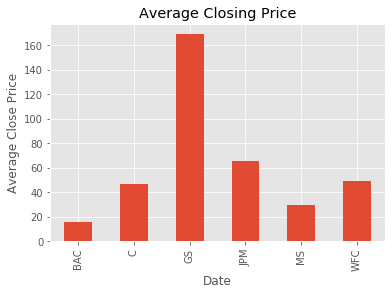

In [15]:
plt.style.use('ggplot')
average_closing.plot(kind='bar')
plt.title("Average Closing Price")
plt.xlabel("Date")
plt.ylabel("Average Close Price")

In [16]:
average_closing.iplot(kind='bar', yTitle = 'Close Price', title = 'Bank of America', mode = 'markers', ticktext = ['a','b','c','d','e','f'])


** What is the max Close price for each bank's stock throughout the time period?**

In [17]:
round(bank_price.xs('Close',axis=1,level=1).max(),2)

Tickers
BAC     23.16
C       61.09
GS     243.09
JPM     87.13
MS      43.73
WFC     57.29
dtype: float64

In [18]:
MBAC = round(max(df.Close.BAC),2)
MC = round(max(df.Close.C),2)
MGS = round(max(df.Close.GS),2)
MJPM = round(max(df.Close.JPM),2)
MMS = round(max(df.Close.MS),2)
MWFC = round(max(df.Close.WFC),2)
bank_mlist = ['MBAC','MC','MGS','MJPM','MMS','MWFC']
df2 = pd.DataFrame({'Banks':bank_mlist,'Max_Close':[MBAC,MC,MGS,MJPM,MMS,MWFC]})

In [19]:
df2

,Banks,Max_Close
0,MBAC,23.16
1,MC,61.09
2,MGS,243.09
3,MJPM,87.13
4,MMS,43.73
5,MWFC,57.29


** Create a new dataframe called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [20]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a new dataframe representing this return value. Use .groupby().**

In [21]:
# your code here
for c in bank_list:
    returns[c]=bank_price[c]["Close"].pct_change()
returns

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.000000,-0.005281,-0.017218,0.001729,-0.006353,-0.000378
2016-01-06,-0.021303,-0.014550,-0.024413,-0.014436,-0.024936,-0.019096
2016-01-07,-0.036070,-0.051077,-0.030735,-0.040439,-0.049836,-0.028527
2016-01-08,-0.019355,-0.030067,-0.004131,-0.022399,-0.020704,-0.016667
...,...,...,...,...,...,...
2016-12-23,0.002662,0.008266,0.003540,0.001841,0.006310,0.003767
2016-12-27,0.000442,0.001640,0.002448,0.000919,0.001393,-0.000179
2016-12-28,-0.012384,-0.017188,-0.003767,-0.007231,-0.011596,-0.011260


** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Did anything significant happen that day?**

In [22]:
# your code here
print(returns.idxmin())
print(returns.idxmax())

BAC   2016-06-24
C     2016-06-24
GS    2016-06-24
JPM   2016-06-24
MS    2016-06-24
WFC   2016-06-24
dtype: datetime64[ns]
BAC   2016-02-12
C     2016-02-12
GS    2016-11-09
JPM   2016-02-12
MS    2016-11-09
WFC   2016-11-10
dtype: datetime64[ns]


In [23]:
worst1 = bank_price.loc[bank_price.index == '2016-06-23']
worst2 = bank_price.loc[bank_price.index == '2016-06-24']
best1 = bank_price.loc[bank_price.index == '2016-02-12']
best2 = bank_price.loc[bank_price.index == '2016-11-09']
events = pd.concat([worst1,worst2,best1,best2])
events

Tickers           BAC                                                   \
Stages           High    Low   Open      Close       Volume  Adj Close   
Date                                                                     
2016-06-23  14.050000  13.82  13.84  14.040000   82494600.0  13.231733   
2016-06-24  13.440000  12.97  13.05  13.000000  231499200.0  12.251606   
2016-02-12  12.030000  11.40  11.48  11.950000  245388400.0  11.181433   
2016-11-09  18.049999  17.40  17.66  17.969999  319516900.0  17.014307   

Tickers                     C                        ...          MS  \
Stages     Company       High        Low       Open  ...      Volume   
Date                                                 ...               
2016-06-23     BOA  44.500000  43.470001  43.509998  ...  18027200.0   
2016-06-24     BOA  41.389999  40.259998  40.630001  ...  49311900.0   
2016-02-12     BOA  37.869999  35.980000  36.029999  ...  22802200.0   
2016-11-09     BOA  51.939999  49.470001  50.070000  ...  28311000.0   

Tickers                                     WFC                        \
Stages      Adj Close        Company       High        Low       Open   
Date                                                                    
2016-06-23  25.124868  MorganStanley  47.910000  47.389999  47.639999   
2016-06-24  22.574631  MorganStanley  46.970001  45.279999  45.759998   
2016-02-12  21.142344  MorganStanley  47.389999  45.930000  45.959999   
2016-11-09  34.056992  MorganStanley  48.610001  46.000000  46.330002   

Tickers                                                   
Stages          Close      Volume  Adj Close     Company  
Date                                                      
2016-06-23  47.910000  16270000.0  42.815773  WellsFargo  
2016-06-24  45.709999  46744100.0  40.849701  WellsFargo  
2016-02-12  47.310001  28533900.0  41.958252  WellsFargo  
2016-11-09  47.990002  67615000.0  43.591862  WellsFargo  

[4 rows x 42 columns]

In [24]:
ls = []
# bank_return_list = ['BACReturn','CReturn','GSReturn','JPMReturn','MSReturn','WFCReturn']
for z in bank_list:
    ls.append({'Company':z,'BestReturnDate':returns[z].idxmax(),'BestReturn':returns[z].max(),'WorstReturnDate':returns[z].idxmin(),'WorstReturn':returns[z].min()})
ExtremeReturn = pd.DataFrame(ls)
ExtremeReturn

,Company,BestReturnDate,BestReturn,WorstReturnDate,WorstReturn
0,BAC,2016-02-12,0.070789,2016-06-24,-0.074074
1,C,2016-02-12,0.073185,2016-06-24,-0.093567
2,GS,2016-11-09,0.058872,2016-06-24,-0.070745
3,JPM,2016-02-12,0.083286,2016-06-24,-0.069477
4,MS,2016-11-09,0.070968,2016-06-24,-0.101502
5,WFC,2016-11-10,0.075849,2016-06-24,-0.045919


** Please state here what you have noticed. Did anything significant happen in that time frame? **

I notice that, worst single day returns for all $6$ banks are on the same date, which is $2016-06-24$, I believe it is due to the Leave Vote Occur in UK at that time.

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? **

In [25]:
#  your code here
returns.std()

BAC    0.020209
C      0.020060
GS     0.016886
JPM    0.015472
MS     0.020555
WFC    0.015015
dtype: float64

Since MS Morgan Stanley has the highest standard deviation of the returns among all six banks, I would classify MS as the riskiest bank over the entire time period

** Which would you classify as the riskiest for the year 2016? **

In [26]:
# your code here
returns.loc["2016-01-01":"2016-12-31"].std()

BAC    0.020209
C      0.020060
GS     0.016886
JPM    0.015472
MS     0.020555
WFC    0.015015
dtype: float64

** Create a density plot using any library you like to visualize the previous year's return for each bank **

Text(0.5, 1.0, 'Return for each bank')

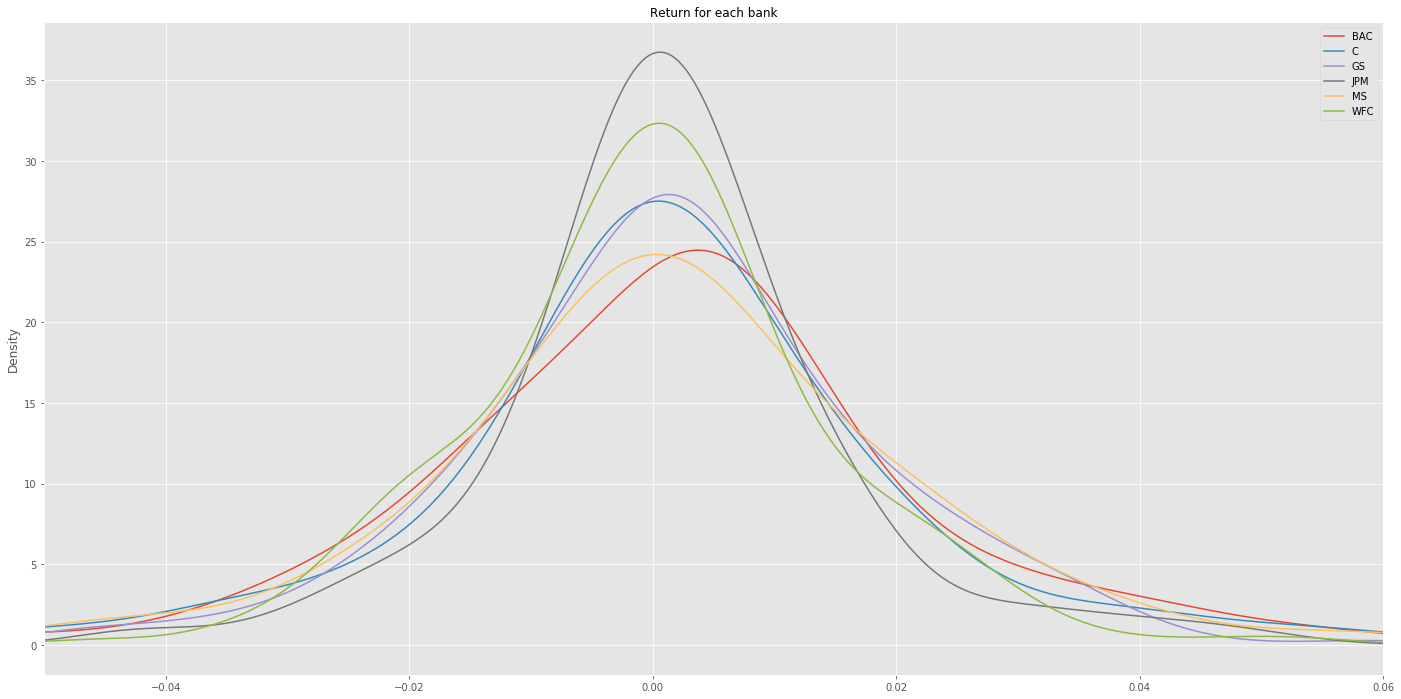

In [27]:
# your code here
returns.dropna().plot(kind='kde', xlim=(-0.05,0.06),figsize = (24,12))
plt.title('Return for each bank', fontsize = (12))

### Moving Averages

** Please derive the moving averages for these stocks in the year 2016. Use .rolling() in pandas to get the rolling average calculation. ** 



In [28]:
# your code here
bank_price.xs("Close",axis=1,level=1).rolling(window=50).mean()

Tickers,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2016-12-23,19.6036,54.4322,206.5844,76.973800,38.4494,50.8468
2016-12-27,19.7358,54.6818,208.0052,77.366000,38.6704,51.0716
2016-12-28,19.8614,54.9106,209.4382,77.752600,38.8870,51.2880


** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2016**

In [29]:
# your code here
plt.figure()
BAC['Close'].iplot(kind='scatter')
BAC['Close'].rolling(window=30).mean().iplot()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'BAC Price')

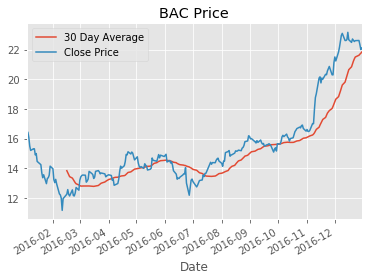

In [30]:
BAC['Close'].rolling(window=30).mean().plot(label="30 Day Average")
BAC['Close'].plot(label="Close Price")
plt.legend()
plt.title("BAC Price")

** Create a heatmap of the correlation between the stocks Close Price.**


In [31]:
# your code here
import seaborn as sns

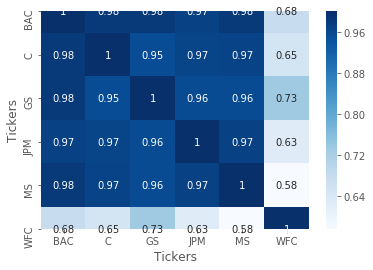

In [32]:
sns.heatmap(bank_price.xs(key="Close",axis=1,level=1).corr(),cmap="Blues",annot=True)

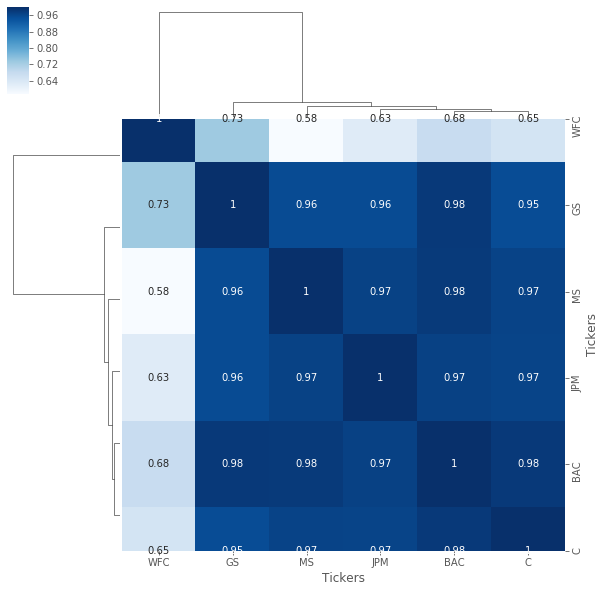

In [33]:
sns.clustermap(bank_price.xs(key="Close",axis=1,level=1).corr(),cmap="Blues",annot=True)

# Part 2. 

Please generate some visualization using the crunchbase database you downloaded for the midterm. Feel free to use any plotting packages (in Python), and generate any types of figures. You may also comment on the generated figures, and explain any insights you have obtained. 

In [359]:
# %%sql
# select cc.state_code, count(distinct cc.permalink) as uniqueC, count(distinct ca.company_permalink) as unique_acquiredC
# from crunchbase_companies as cc
# left join crunchbase_acquisitions as ca
# on cc.permalink = ca.company_permalink
# where cc.state_code is NOT NULL
#  GROUP BY 1
#  ORDER BY 3 DESC

In [1]:
from matplotlib.pyplot import figure
import pandas
import sqlite3
import matplotlib.pyplot as plt
%load_ext sql
%sql sqlite:///crunchbase_analysis.db

'Connected: @crunchbase_analysis.db'

In [5]:
conn = sqlite3.connect("crunchbase_analysis.db")
df6 = pd.read_sql_query("select * from crunchbase_investments;", conn)
df6

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
0,/company/tokita-investments,Tokita Investments,consulting,JPN,None,TBD,Okinawa Ken,/company/01startups,01Startups,None,...,None,unknown,None,angel,9/26/13,2013-09,2013-Q3,2013.0,5000.0,1
1,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,ecommerce,...,NY,New York,New York,series-a,10/30/12,2012-10,2012-Q4,2012.0,2000000.0,2
2,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/23/12,2012-01,2012-Q1,2012.0,20000.0,3
3,/company/utap,uTaP,messaging,USA,None,United States - Other,None,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/1/12,2012-01,2012-Q1,2012.0,20000.0,4
4,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,angel,2/15/12,2012-02,2012-Q1,2012.0,20000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83888,/company/comprehend-systems,Comprehend Systems,enterprise,USA,CA,SF Bay,Palo Alto,/person/zorba-lieberman,Zorba Lieberman,None,...,None,unknown,None,series-a,7/11/13,2013-07,2013-Q3,2013.0,8400000.0,83889
83889,/company/smartthings,SmartThings,mobile,USA,DC,unknown,Minneapolis,/person/zorik-gordon,Zorik Gordon,None,...,None,unknown,None,series-a,12/4/12,2012-12,2012-Q4,2012.0,3000000.0,83890
83890,/company/seventh-continent,Seventh Continent,games_video,None,None,unknown,None,/person/zsolt-menesi,Zsolt Menesi,None,...,None,unknown,None,angel,7/1/09,2009-07,2009-Q3,2009.0,400000.0,83891
83891,/company/keeptruckin,KeepTruckin,transportation,USA,CA,SF Bay,San Francisco,/person/zubair-jandali,Zubair Jandali,None,...,None,unknown,None,series-a,7/1/13,2013-07,2013-Q3,2013.0,2300000.0,83892


In [4]:
conn = sqlite3.connect("crunchbase_analysis.db")
df5 = pd.read_sql_query("select * from crunchbase_companies;", conn)
df5

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_at_clean,id
0,/company/8868,8868,http://www.8868.cn,None,NaN,operating,None,None,unknown,None,1.0,None,None,1
1,/company/21e6,2.10E+07,None,None,5050000.0,operating,USA,CA,SF Bay,San Francisco,1.0,1/1/13,2013-01-01,2
2,/company/club-domains,.Club Domains,http://dotclub.com,software,7000000.0,operating,USA,FL,Fort Lauderdale,Oakland Park,1.0,10/10/11,2011-10-10,3
3,/company/fox-networks,.Fox Networks,http://www.dotfox.com,advertising,4912394.0,closed,ARG,None,Buenos Aires,Buenos Aires,1.0,None,None,4
4,/company/a-list-games,[a]list games,http://www.alistgames.com,games_video,9300000.0,operating,None,None,unknown,None,1.0,None,None,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27322,/company/zyraz-technology,Zyraz Technology,http://www.zyraz.com,biotech,15398911.0,closed,MYS,None,Damansara,Damansara,3.0,1/1/94,1994-01-01,27323
27323,/company/zyrra,Zyrra,http://www.zyrra.com,ecommerce,1460500.0,operating,USA,MA,Boston,Cambridge,3.0,None,None,27324
27324,/company/zytoprotec,Zytoprotec,http://www.zytoprotec.com,biotech,2686600.0,operating,AUT,None,Wien,Wien,1.0,1/1/07,2007-01-01,27325
27325,/company/zzzzapp-com,Zzzzapp!,http://www.zzzzapp.com,mobile,39013.0,operating,HRV,None,Split,Split,2.0,5/13/12,2012-05-13,27326


In [8]:
state = df5[["state_code",'funding_total_usd']]
state

,state_code,funding_total_usd
0,None,NaN
1,CA,5050000.0
2,FL,7000000.0
3,None,4912394.0
4,None,9300000.0
...,...,...
27322,None,15398911.0
27323,MA,1460500.0
27324,None,2686600.0
27325,None,39013.0


In [9]:
state_fund = state.groupby(state.state_code).sum()

In [10]:
#change scientific format
pd.options.display.float_format = '{:.4f}'.format

In [11]:
state_fund.head(5)

,funding_total_usd
state_code,
AK,5249147.0000
AL,275172514.0000
AR,240589591.0000
AZ,2096623919.0000
CA,114665569516.0000


### Insights - Company locate in California, USA got the most amount of funding among all the states

(array([0.0e+00, 2.0e+10, 4.0e+10, 6.0e+10, 8.0e+10, 1.0e+11, 1.2e+11,
        1.4e+11]), <a list of 8 Text yticklabel objects>)

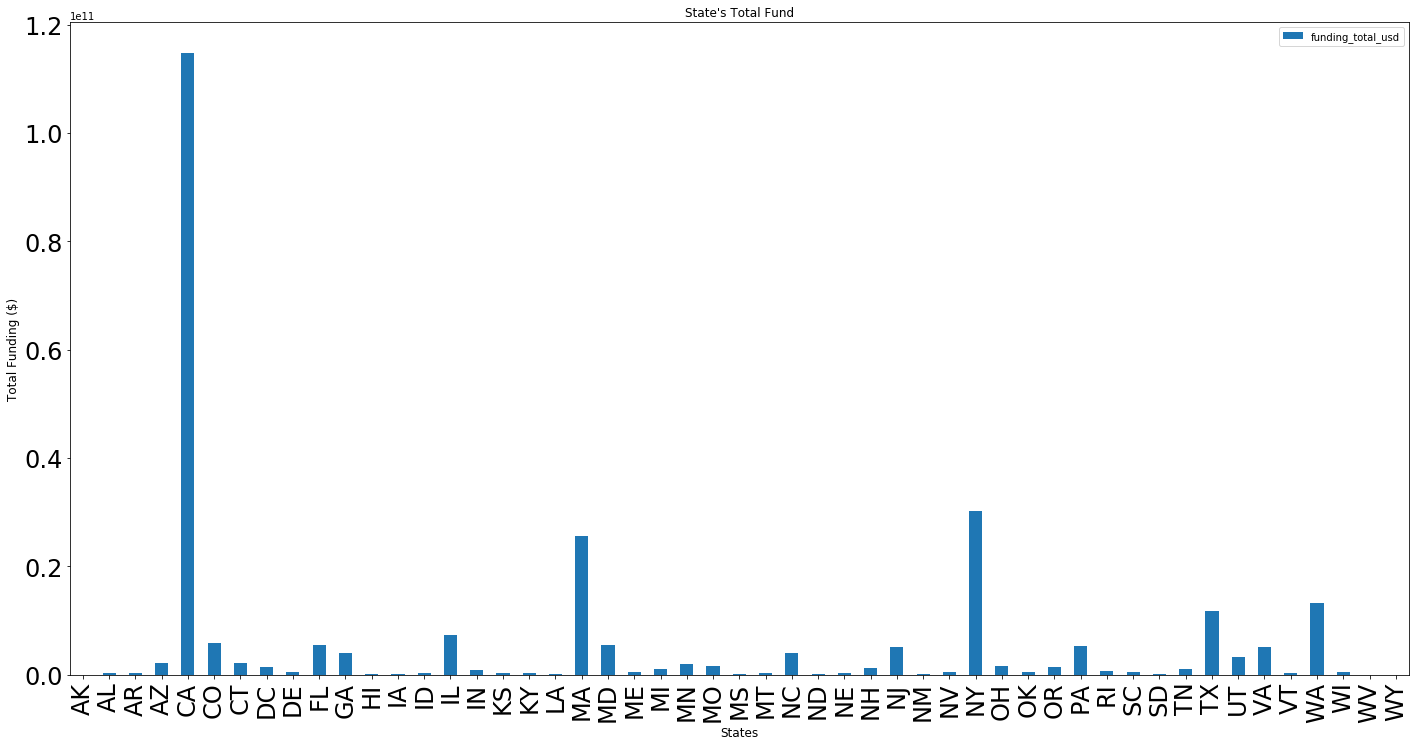

In [12]:
# plt.style.use('ggplot')
state_fund.plot(kind='bar',figsize=(24, 12))
plt.title("State's Total Fund", fontsize = 12)
plt.xlabel("States", fontsize = 12)
plt.ylabel("Total Funding ($)", fontsize = 12)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)

In [13]:
category = df5[["state_code",'category_code']]

In [14]:
category.head()

,state_code,category_code
0,None,None
1,CA,None
2,FL,software
3,None,advertising
4,None,games_video


In [15]:
state_category = category.loc[category["state_code"] == 'CA']
state_category

,state_code,category_code
1,CA,None
6,CA,games_video
9,CA,analytics
13,CA,web
18,CA,analytics
...,...,...
27301,CA,ecommerce
27302,CA,mobile
27313,CA,public_relations
27315,CA,hardware


In [16]:
state_category2 = state_category.loc[state_category['category_code'] != 'None']
state_category2.head(5)

,state_code,category_code
1,CA,None
6,CA,games_video
9,CA,analytics
13,CA,web
18,CA,analytics


In [17]:
state_category2.reset_index(drop=True, inplace=True)

In [18]:
state_category2.head()

,state_code,category_code
0,CA,None
1,CA,games_video
2,CA,analytics
3,CA,web
4,CA,analytics


In [19]:
CA_category_count = state_category2.groupby(state_category2['category_code']).count()
CA_category_count.head()

,state_code
category_code,
advertising,273
analytics,186
automotive,23
biotech,559
cleantech,174


### Insights - Company locate in California, USA most of them are 'software' comapnies, follow by 'biotech' and 'web' companies

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text xticklabel objects>)

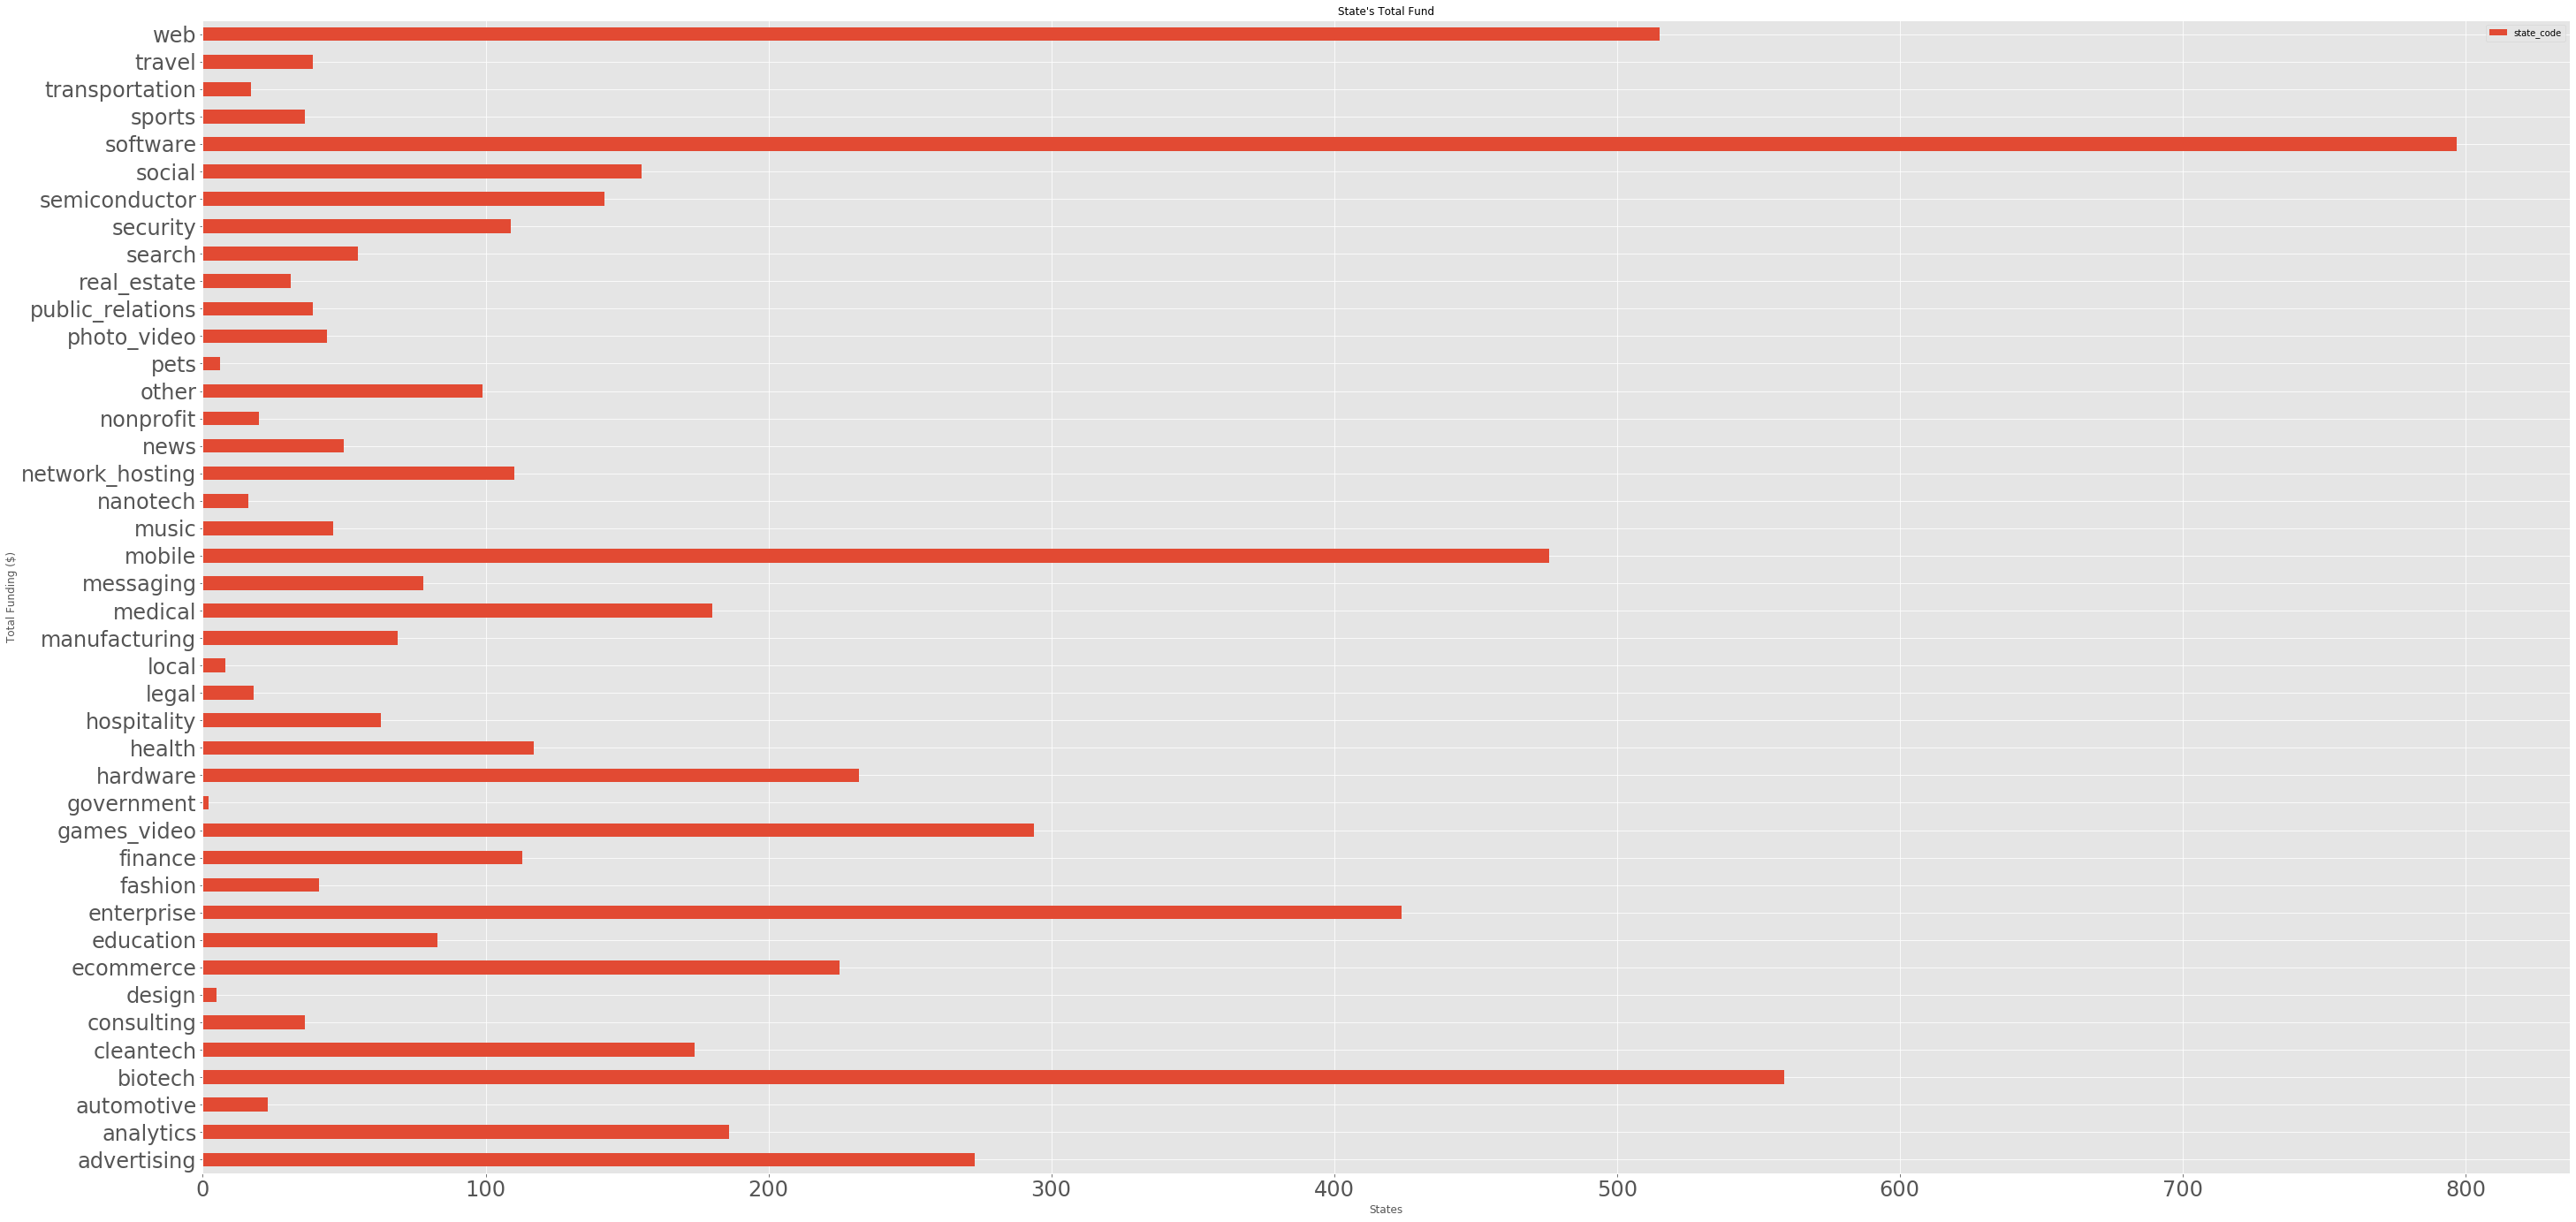

In [20]:
plt.style.use('ggplot')
CA_category_count.plot(kind='barh',figsize=(48, 24))
plt.title("State's Total Fund", fontsize = 12)
plt.xlabel("States", fontsize = 12)
plt.ylabel("Total Funding ($)", fontsize = 12)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 24)

### Insights - Top 5 investors that invest in 'software' companies located in CA, USA are Benchmark, Accel
### Partners, Sequoia Capital, Greylock Partners, Redpoint Ventures

In [21]:
CA_company = df6.loc[df6["company_state_code"] == 'CA']

In [22]:
CA_software = CA_company.loc[CA_company["company_category_code"] == 'software']

In [23]:
CA_fundsoftware = CA_software[['investor_name','raised_amount_usd']].groupby(CA_software['investor_name']).sum()
CA_fundsoftwaretop = CA_fundsoftware['raised_amount_usd'].sort_values(ascending = False)
CA_fundsoftwaretop5 = CA_fundsoftwaretop.head(5)

(array([0.0e+00, 2.0e+08, 4.0e+08, 6.0e+08, 8.0e+08, 1.0e+09, 1.2e+09,
        1.4e+09]), <a list of 8 Text yticklabel objects>)

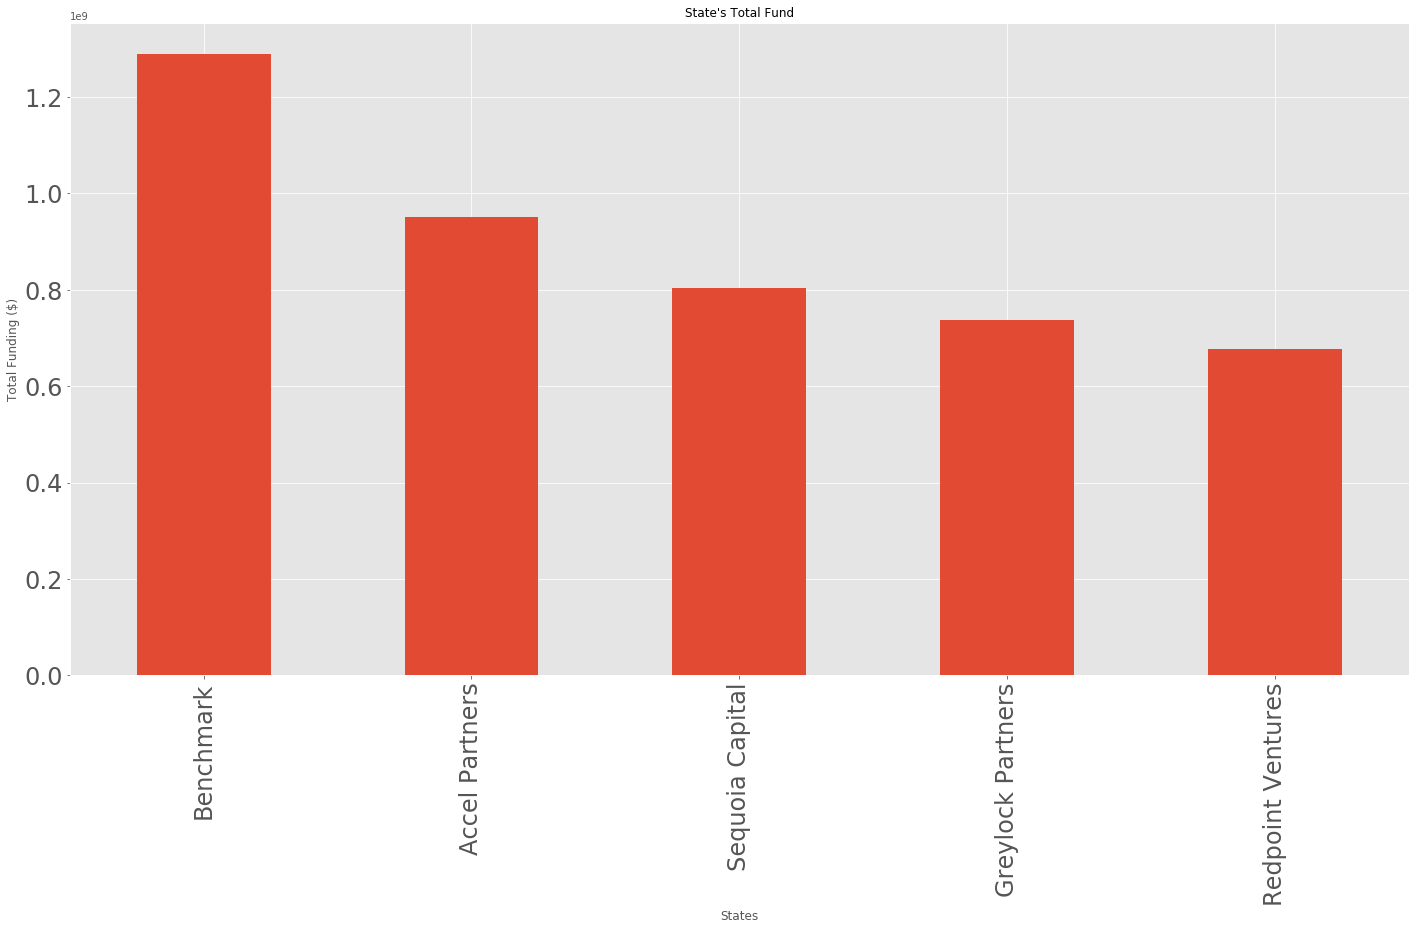

In [24]:
CA_fundsoftwaretop5.plot(kind='bar',figsize=(24, 12))
plt.title("State's Total Fund", fontsize = 12)
plt.xlabel("States", fontsize = 12)
plt.ylabel("Total Funding ($)", fontsize = 12)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)

In [25]:
df6.head()

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
0,/company/tokita-investments,Tokita Investments,consulting,JPN,None,TBD,Okinawa Ken,/company/01startups,01Startups,None,...,None,unknown,None,angel,9/26/13,2013-09,2013-Q3,2013.0000,5000.0000,1
1,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,ecommerce,...,NY,New York,New York,series-a,10/30/12,2012-10,2012-Q4,2012.0000,2000000.0000,2
2,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/23/12,2012-01,2012-Q1,2012.0000,20000.0000,3
3,/company/utap,uTaP,messaging,USA,None,United States - Other,None,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/1/12,2012-01,2012-Q1,2012.0000,20000.0000,4
4,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,angel,2/15/12,2012-02,2012-Q1,2012.0000,20000.0000,5


In [26]:
CA = df6[df6['company_state_code'] == 'CA'].dropna()
CA

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
1,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,ecommerce,...,NY,New York,New York,series-a,10/30/12,2012-10,2012-Q4,2012.0000,2000000.0000,2
2,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/23/12,2012-01,2012-Q1,2012.0000,20000.0000,3
30,/company/lovely,Lovely,real_estate,USA,CA,SF Bay,San Francisco,/company/3taps,3taps,web,...,CA,SF Bay,San Francisco,series-a,10/1/12,2012-10,2012-Q4,2012.0000,2000000.0000,31
43,/company/fisker,Fisker Automotive,automotive,USA,CA,Los Angeles,Irvine,/company/a123systems,A123 Systems,nanotech,...,MA,Boston,Watertown,private-equity,5/1/10,2010-05,2010-Q2,2010.0000,189000000.0000,44
44,/company/fisker,Fisker Automotive,automotive,USA,CA,Los Angeles,Irvine,/company/a123systems,A123 Systems,nanotech,...,MA,Boston,Watertown,private-equity,2/22/11,2011-02,2011-Q1,2011.0000,150000000.0000,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,/company/opentable,OpenTable,hospitality,USA,CA,SF Bay,San Francisco,/company/zagat,Zagat,web,...,NY,New York,New York City,series-b,1/1/00,2000-01,2000-Q1,2000.0000,10000000.0000,6487
6488,/company/gainspan,GainSpan,semiconductor,USA,CA,SF Bay,San Jose,/company/zebra-technologies,Zebra Technologies,enterprise,...,IL,Chicago,Lincolnshire,series-c+,6/26/13,2013-06,2013-Q2,2013.0000,19000000.0000,6489
6503,/company/wheelz,Wheelz,automotive,USA,CA,SF Bay,San Francisco,/company/zipcar,Zipcar,transportation,...,GA,NW Atlanta,NW Atlanta,series-a,2/22/12,2012-02,2012-Q1,2012.0000,13700000.0000,6504
6507,/company/red-tricycle,Red Tricycle,web,USA,CA,SF Bay,Sausalito,/company/zulily,zulily,ecommerce,...,WA,Seattle,Seattle,series-a,11/30/12,2012-11,2012-Q4,2012.0000,1500000.0000,6508


In [27]:
CA['funded_at'] = pd.to_datetime(CA['funded_at'])
# CA.groupby(CA['funded_month']).count()
CA.head()

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
1,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,ecommerce,...,NY,New York,New York,series-a,2012-10-30,2012-10,2012-Q4,2012.0000,2000000.0000,2
2,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,2012-01-23,2012-01,2012-Q1,2012.0000,20000.0000,3
30,/company/lovely,Lovely,real_estate,USA,CA,SF Bay,San Francisco,/company/3taps,3taps,web,...,CA,SF Bay,San Francisco,series-a,2012-10-01,2012-10,2012-Q4,2012.0000,2000000.0000,31
43,/company/fisker,Fisker Automotive,automotive,USA,CA,Los Angeles,Irvine,/company/a123systems,A123 Systems,nanotech,...,MA,Boston,Watertown,private-equity,2010-05-01,2010-05,2010-Q2,2010.0000,189000000.0000,44
44,/company/fisker,Fisker Automotive,automotive,USA,CA,Los Angeles,Irvine,/company/a123systems,A123 Systems,nanotech,...,MA,Boston,Watertown,private-equity,2011-02-22,2011-02,2011-Q1,2011.0000,150000000.0000,45


In [28]:
CA_company = CA[['investor_name','funded_month']]

In [29]:
CA_company.head()

,investor_name,funded_month
1,1-800-FLOWERS.COM,2012-10
2,10Xelerator,2012-01
30,3taps,2012-10
43,A123 Systems,2010-05
44,A123 Systems,2011-02


In [51]:
month = [i.split('-')[1]for i in CA_company['funded_month'].astype(str)]
month

['10',
 '01',
 '10',
 '05',
 '02',
 '11',
 '01',
 '05',
 '10',
 '07',
 '07',
 '05',
 '12',
 '09',
 '06',
 '08',
 '03',
 '05',
 '03',
 '01',
 '04',
 '06',
 '10',
 '09',
 '11',
 '06',
 '05',
 '10',
 '12',
 '07',
 '12',
 '07',
 '08',
 '10',
 '09',
 '08',
 '11',
 '05',
 '07',
 '05',
 '11',
 '08',
 '05',
 '12',
 '12',
 '11',
 '05',
 '06',
 '05',
 '01',
 '07',
 '04',
 '11',
 '01',
 '01',
 '04',
 '08',
 '08',
 '06',
 '01',
 '08',
 '10',
 '06',
 '11',
 '02',
 '05',
 '09',
 '01',
 '02',
 '02',
 '12',
 '09',
 '02',
 '01',
 '04',
 '02',
 '03',
 '12',
 '05',
 '07',
 '10',
 '04',
 '04',
 '06',
 '07',
 '11',
 '02',
 '07',
 '01',
 '04',
 '05',
 '06',
 '03',
 '10',
 '12',
 '01',
 '09',
 '12',
 '07',
 '10',
 '11',
 '01',
 '08',
 '10',
 '09',
 '03',
 '11',
 '11',
 '06',
 '01',
 '11',
 '09',
 '12',
 '10',
 '02',
 '06',
 '10',
 '12',
 '12',
 '06',
 '08',
 '04',
 '07',
 '06',
 '10',
 '01',
 '04',
 '01',
 '07',
 '08',
 '04',
 '01',
 '06',
 '07',
 '06',
 '02',
 '03',
 '06',
 '01',
 '07',
 '07',
 '02',
 '02',

In [62]:
CA_company.head()

,investor_name,funded_month
1,1-800-FLOWERS.COM,10
2,10Xelerator,01
30,3taps,10
43,A123 Systems,05
44,A123 Systems,02


In [63]:
month_company = CA_company.groupby(CA_company['funded_month']).count()

In [66]:
month_company

,investor_name
funded_month,
01,102
02,56
03,54
04,57
05,81
06,119
07,59
08,64
09,58


### Insights - Investor are more likely to fund companies during Janurary, June or October
### Start-ups could reach out to investors, or prepare pitchdecks before these months

In [75]:
month_company.iplot(kind = 'line')

# Great Job!
